In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

In [2]:
tic = time.time()

In [3]:
flights = pd.read_csv('data/flights_clean.csv').sample(10000)
flights

,airline,day,day_of_week,departure_delay,destination_airport,destination_latitude,destination_longitude,distance,month,origin_airport,...,scheduled_arrival,scheduled_departure,scheduled_time,state_destination,state_origin,taxi_in,taxi_out,day_of_year,origin_temperature,destination_temperature
3093131,UA,23,3,-4.0,IAD,38.94453,-77.45581,1956,9,PHX,...,890,450,260.0,VA,AZ,5.0,10.0,266,80.7,69.8
3749631,EV,3,2,-6.0,DAY,39.90238,-84.21938,533,3,EWR,...,585,465,120.0,OH,NJ,6.0,12.0,62,27.0,26.4
780302,DL,26,7,59.0,SLC,40.78839,-111.97777,1195,7,IAH,...,1265,1135,190.0,UT,TX,5.0,17.0,207,87.0,82.5
211185,UA,31,2,-9.0,ORD,41.97960,-87.90446,802,3,DFW,...,567,425,142.0,IL,TX,17.0,17.0,90,71.5,48.7
3662322,OO,7,7,0.0,LIT,34.72940,-92.22425,771,6,DEN,...,783,595,128.0,AR,CO,6.0,20.0,158,64.6,82.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923222,UA,21,6,3.0,MCO,28.42889,-81.31603,758,3,IAD,...,654,510,144.0,FL,VA,9.0,20.0,80,44.0,75.9
1759274,NK,27,5,-8.0,TPA,27.97547,-82.53325,1012,2,ORD,...,736,515,161.0,FL,IL,3.0,24.0,58,6.0,57.9
3873367,WN,13,4,92.0,ROC,43.11887,-77.67238,523,8,MDW,...,30,1320,90.0,NY,IL,5.0,10.0,225,73.8,65.2
1745245,EV,26,4,-11.0,IAH,29.98047,-95.33972,201,2,CRP,...,397,335,62.0,TX,TX,11.0,13.0,57,51.7,40.5


In [4]:
pre_y = flights.departure_delay

In [5]:
pre_X = flights.drop(columns=['departure_delay', 'airline', 'destination_airport',
                              'origin_airport', 'state_destination', 'state_origin'])

In [6]:
X, X_test, y, y_test = train_test_split(pre_X, pre_y)

In [7]:
scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)

In [8]:
#Creating a range of values of the tuning parameter to visualize the lasso coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,100)*0.1

In [9]:
#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)

Text(0, 0.5, 'Standardized coefficient')

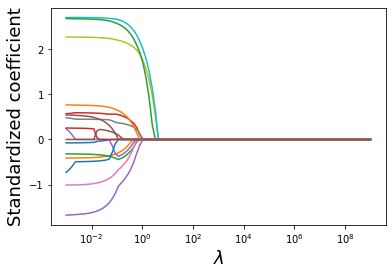

In [10]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
#plt.plot([lassocv.alpha_,lassocv.alpha_],[-0.4,0.25],':')

In [11]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

0.19137472392581564

Text(0, 0.5, 'Cross-validation error')

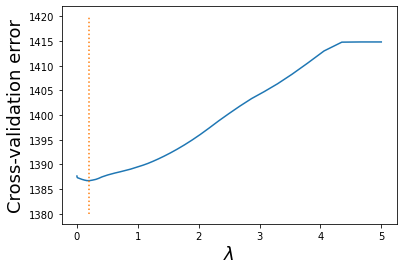

In [19]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(lassocv.alphas_,lassocv.mse_path_.mean(axis=1))
plt.plot([lassocv.alpha_,lassocv.alpha_],[1380,1420],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

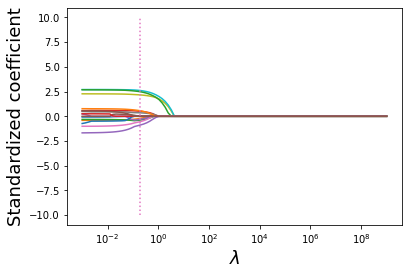

In [13]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
alphas = 10**np.linspace(10,-2,100)*0.1
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.plot([lassocv.alpha_,lassocv.alpha_],[-10,10],':')

In [14]:
Xtest_std = scaler.transform(X_test)

In [15]:
#Using the developed lasso model to predict on test data
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xstd, y)
pred=lasso.predict(Xtest_std)

In [16]:
#RMSE on test data
np.sqrt(((pred-y_test)**2).mean())

45.12435787720725

In [17]:
y_test.std()

45.49223326981368

In [18]:
toc = time.time()
toc - tic

35.93799090385437

In [4]:
tic_dummy = time.time()

In [5]:
flights = pd.read_csv('data/flights_clean_numerical_significant.csv').sample(10000)
flights

,day,day_of_week,day_of_year,departure_delay,destination_latitude,destination_longitude,destination_temperature,distance,month,origin_latitude,...,destination_airport_BTV,destination_airport_DTW,destination_airport_FNT,origin_airport_CMH,origin_airport_IAD,origin_airport_LNK,origin_airport_RIC,state_destination_MI,state_destination_VT,state_origin_NE
158862,15,7,74,37.0,33.43417,-112.00806,76.3,651,3,37.61900,...,0,0,0,0,0,0,0,0,0,0
242250,10,5,100,-2.0,45.58872,-122.59750,35.9,933,4,32.73356,...,0,0,0,0,0,0,0,0,0,0
3148797,1,7,305,31.0,35.21401,-80.94313,58.4,468,11,28.42889,...,0,0,0,0,0,0,0,0,0,0
3555875,28,1,362,1.0,36.08036,-115.15233,38.7,414,12,37.61900,...,0,0,0,0,0,0,0,0,0,0
1020775,7,1,250,-6.0,43.64617,-70.30875,59.7,273,9,40.63975,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70772,4,3,35,4.0,33.43417,-112.00806,63.4,843,2,29.53369,...,0,0,0,0,0,0,0,0,0,0
1005884,3,4,246,1.0,37.61900,-122.37484,63.9,651,9,33.43417,...,0,0,0,0,0,0,0,0,0,0
2612715,2,4,183,18.0,40.77724,-73.87261,75.7,1620,7,39.85841,...,0,0,0,0,0,0,0,0,0,0
1568490,3,2,34,-5.0,32.89595,-97.03720,39.8,1303,2,39.87195,...,0,0,0,0,0,0,0,0,0,0


In [6]:
pre_y = flights.departure_delay

In [7]:
pre_X = flights.drop(columns=['departure_delay'])

In [8]:
X, X_test, y, y_test = train_test_split(pre_X, pre_y)

In [9]:
scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)

In [10]:
#Creating a range of values of the tuning parameter to visualize the lasso coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,100)*0.1

In [11]:
#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.987e+04, tolerance: 9.742e+02
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'Standardized coefficient')

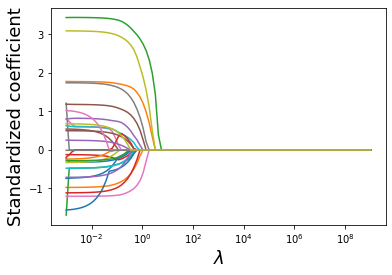

In [12]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
#plt.plot([lassocv.alpha_,lassocv.alpha_],[-0.4,0.25],':')

In [13]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

0.3334959831515061

Text(0, 0.5, 'Cross-validation error')

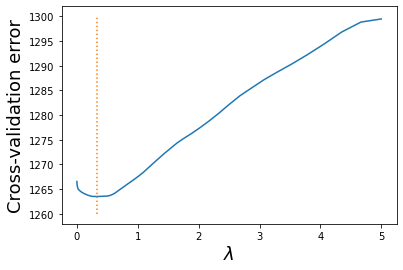

In [22]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(lassocv.alphas_,lassocv.mse_path_.mean(axis=1))
plt.plot([lassocv.alpha_,lassocv.alpha_],[1260,1300],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

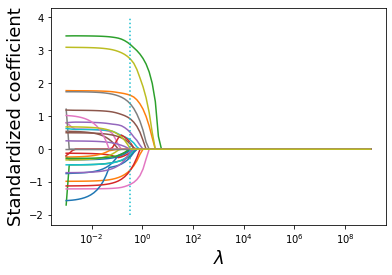

In [23]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
alphas = 10**np.linspace(10,-2,100)*0.1
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.plot([lassocv.alpha_,lassocv.alpha_],[-2,4],':')

In [16]:
Xtest_std = scaler.transform(X_test)

In [17]:
#Using the developed lasso model to predict on test data
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xstd, y)
pred=lasso.predict(Xtest_std)

In [18]:
#RMSE on test data
np.sqrt(((pred-y_test)**2).mean())

34.582859396841656

In [19]:
y_test.std()

35.07209314151246

In [20]:
toc_dummy = time.time()
toc_dummy - tic_dummy

80.68384265899658

In [24]:
lasso.coef_

array([-2.94256363e-02, -6.33981685e-01, -2.03029173e-01, -9.59490032e-02,
        5.13749255e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.83596806e-01, -1.05772350e-03,  1.63783519e+00,
        3.18037602e+00,  2.05440079e-01,  0.00000000e+00,  9.24215453e-01,
       -1.06760601e+00,  1.38172566e+00,  2.74342939e+00, -1.54429622e-01,
       -2.44703210e-01, -0.00000000e+00, -0.00000000e+00, -6.45305468e-01,
       -8.18750897e-02,  1.61176135e-01, -0.00000000e+00, -4.31418341e-03,
        4.64609577e-03])

In [45]:
print('departure_delay =')
for i in range(len(X.columns)):
    if lasso.coef_[i] != 0:
        print('{:+3f} * {}'.format(lasso.coef_[i], X.columns[i]))

departure_delay =
-0.029426 * day
-0.633982 * day_of_week
-0.203029 * day_of_year
-0.095949 * destination_latitude
+0.513749 * destination_longitude
+0.283597 * origin_longitude
-0.001058 * origin_temperature
+1.637835 * scheduled_arrival
+3.180376 * scheduled_departure
+0.205440 * scheduled_time
+0.924215 * taxi_out
-1.067606 * airline_AS
+1.381726 * airline_NK
+2.743429 * airline_UA
-0.154430 * destination_airport_BTV
-0.244703 * destination_airport_DTW
-0.645305 * origin_airport_IAD
-0.081875 * origin_airport_LNK
+0.161176 * origin_airport_RIC
-0.004314 * state_destination_VT
+0.004646 * state_origin_NE
